# Predicting Popular Music - Spotify &amp; Machine Learning

## Phase 1 - Preprocessing and Exploration

#### Authors:
Alexander Hudson <br>
Student 2 <br>
Student 3

## Table of Contents:
1. [Introduction](#INT)
> 1.1 [Dataset Source](#DS) <br>
> 1.2 [Dataset Details](#DD) <br>
> 1.3 [Dataset Features](#DF) <br>
> 1.4 [Target Feature](#TF)
2. [Goals and Objectives](#GO)
3. [Data Cleaning and Preprocessing](#DCP)
> 3.1 [Removing ID-like Columns](#ID) <br>
> 3.2 [Descriptive Statistics](#DESC) <br>
> 3.3 [Discretising Features](#DIS) <br>
> 3.4 [Removing Potential Outliers](#OUT) <br>
> 3.5 [Correlated Variables](#CV) <br>
4. [Data Exploration and Visalisation](#VIS) 
> 4.1 [Visualising by the <code>'target'</code> Feature](#TAR) <br>
> 4.2 [Visualising by the <code>'energy'</code> Feature](#EN)
5. [Further Preprocessing](#FP)
> 5.1 [One-Hot Encoding Categorical Variables](#OH) <br>
> 5.2 [Scaling the Dataset](#SD)
5. [Summary and Conclusions](#SC)
6. [References](#REF)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

## <a id='INT'>Introduction </a>

### <a id='DS'>Dataset Source</a>

The data was taken from a page in Kaggle titled, [The Spotify Hit Predictor Dataset (1960-2019)](https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset) (Ansari, 2020). Since datasets provided by the page were by decade, the 2010 to 2019 dataset was chosen for this project.


### <a id='DD'>Dataset Details</a>

The dataset includes 23 features for tracks fetched using Spotify's Web API. 22 of those features can be considered independent variables as the dataset has already given a binary response/target feature. These features describe different aspects of music, and are used to predict whether or not the song can rise into mainstream popularity. 

### <a id='DF'>Dataset Features</a>

The dataset includes 23 features:

* <code>track</code> (nominal, Units: NA): The Name of the track or song,
* <code>artist</code> (nominal, Units: NA): The Artist that made the track,
* <code>uri</code> (nominal, Units: NA): The resource identifer for the track,
* <code>danceability</code> (numerical, Units: NA): A measure between 0.0 and 1.0 that describes how appropriate the song is for dancing based on musical aspects like tempo, type of rhythm, and beat,
* <code>energy</code> (numerical, Units: NA): A measure between 0.0 and 1.0 that describes how perceptual song intensity, characterized by the song feeling fast and loud,
* <code>key</code> (categorical, Units: NA): The estimated musical key of the track; the notes have been converted into values from 0 to 11 starting from C = 0, C#/Db = 1, D = 2, and so on,
* <code>loudness</code> (numerical, Units: decibels, or dB): Values typically between -60 and 0 that describe the loudness of a track; values are averaged across the entire song and are useful in comparing relative loudness,
* <code>mode</code> (binary, Units: NA): Describes whether or not a song is in a major or minor scale, which derives the melodic content; 0 denotes a minor scale while 1 is a major scale,
* <code>speechiness</code> (numerical, Units: NA): A measure between 0.0 and 1.0 that describes the presence of spoken words; values tending to one imply more "spoken word" and "podcast-like" tracks while values tending to 0.0 are more instrumental and musical, 
* <code>acousticness</code> (numeric, Units: NA): A measure between 0.0 to 1.0 that describes how "acoustic" a song is,
* <code>instrumentalness</code> (numeric, Units: NA): A measure between 0.0 to 1.0 that describes the lack of vocals; vocal harmonies, i.e. "oohs" and "ahhs", are considered instrumental; values that tend to 1.0 are more likely to contain no vocals,
* <code>liveness</code> (numeric, Units: NA): A measure between 0.0 and 1.0 that describes the presence of an audience; values tending to 1.0 means that there is a higher probability that the track was performed live,
* <code>valence</code> (numeric, Units: NA): A measure between 0.0 and 1.0 that describes the conveyed postivity of a track; values tending to 1.0 means that the track is more postive (e.g., happy and euphoric) while values tending to 0.0 tend to be negative (e.g. sad and angry),
* <code>tempo</code> (numeric, Units: beats per minute, or bpm): A measure of musical beats in a minute; musically, tempo denotes the speed or pace of the song, and a higher bpm imply a faster song,
* <code>duration_ms</code> (numeric, Units: milliseconds, or ms): The duration of a track measured in milliseconds,
* <code>time_signature</code> (categorical, Units: NA): An estimated time signature of a track, musically time signature (or meter) describes the amount of beats per measure or bar,
* <code>chorus_hit</code> (numeric, Units: milliseconds, or ms): The timestamp of the third section of the song, signifying the start of the chorus,
* <code>sections</code> (numeric, Units: NA): The number of sections the song has; this was extracted from an API call for Audio Analysis of a particular track,
* <code>target</code> (binary, Units: NA): Describes whether or not a song is a "hit", as measured through its appearence on the weekly list of Hot-100 from 2010-2019 by Billboards; 1 denotes its appearance (i.e. the song is a hit), with 0 denoting no appearance (i.e. the song is a flop).

### <a id='TF'>Target Feature</a>

The target feature is the whether or not the song reached Billboard's Weekly Top 100 List. Better understanding of what is a "hit" can be described by the author's definition of a "flop", which includes:

* The track not making it to "hit" list,
* The artist of the track not appearing in the "hit" list of that decade,
* The track belongs to a genre that is considered, "non-mainstream" or "avant-garde",
* The track's genre does not have a song that made it into the "hit" list,
* The track must have "US" as one of its markets.

In this dataset, however, the target feature has already been made into a binary feature and has the feature name changed into "target". 

In [2]:
# load datafile and print first 10 rows
spotify = pd.read_csv('C:/Users/Alex/Documents/Projects/Spotify/dataset-of-10s.csv')
spotify.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.0000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.8140,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.0000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.0000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.0000,0.3910,0.780,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.0000,0.4090,0.737,165.084,214320,4,32.17301,12,1
6,Sex Metal Barbie,In This Moment,spotify:track:75BGF4LC7AOLFfxn6ukZDH,0.533,0.935,0,-3.704,1,0.1280,0.01390,0.0000,0.1680,0.481,140.092,262493,4,21.04510,14,0
7,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,0.736,0.522,2,-8.020,1,0.1160,0.02990,0.0000,0.1080,0.369,97.547,200387,4,60.21027,10,1
8,Holiday With HH,No Bros,spotify:track:7LBa0KNFR8IY3g7LOfXqu8,0.166,0.985,7,-2.886,1,0.1700,0.00183,0.0142,0.9580,0.139,174.725,252787,4,31.23583,11,0
9,My Last,Big Sean Featuring Chris Brown,spotify:track:70tFuqBcduJv15bEnOPRTh,0.387,0.773,8,-5.685,1,0.1700,0.09800,0.0000,0.2090,0.368,78.629,254120,4,23.30245,9,1


In [3]:
# basic description of data frame
spotify.info()
spotify.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292537,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


## <a id='GO'>Goals and Objectives</a>

The goal of this project is to use machine learning to predict whether or not a given track will be considered a "hit" according to the author of the dataset. More specifically, it is to predict whether or not the song would have appeared on Billboard's Weekly Top 100s List. This will be done through the use of a selected list of musical features to minimize enough complexity while still reaching adequate accuracy.

## <a id='DCP'> Data Cleaning and Preprocessing </a>

### <a id='ID'>Removing ID-like Columns</a>
The first three columns, 'track', 'artist', and 'uri', are removed because they are redundant and unique identification tags for the song.

In [4]:
# save new data frame for modelling without unique identifying variables
dataset = spotify.iloc[:, 3:20]

### <a id='DESC'>Descriptive Statistics</a>

In [5]:
# check the shaphe of data after removing unique identifying variables
dataset.shape

(6398, 16)

In [6]:
# no missing data identified
dataset.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [7]:
#statistical summary of the dataset's features
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292537,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


Because of the discrepancy between the means and the medians in the features, <code>'speechiness'</code>, <code>'acousticness'</code>, <code>'instrumentalness'</code>, and <code>'liveness'</code>, they will also be checked for outliers and the amount of '0's that each feature has in case they can be discretised.

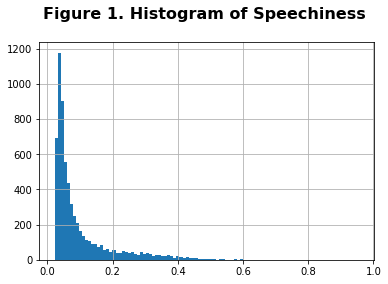

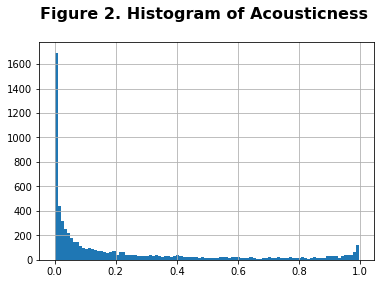

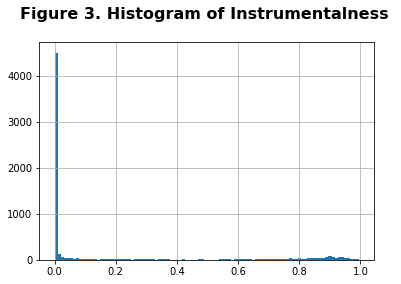

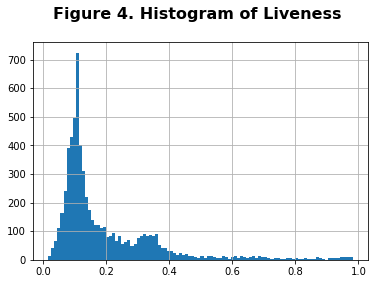

In [8]:
outlier_col1 = ['speechiness', 'acousticness', 'instrumentalness', 'liveness']


for col in outlier_col1: 
    dataset.hist(column = [col], bins = 100)
    plt.title('Figure {}. Histogram of {} \n'.format((outlier_col1.index(col) + 1),col.capitalize()), fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})

After examining of the histograms, we can see that the <code>'instrumentalness'</code> feature has a very high number of '0' values. This implies that it could discretize into a binary feature, which we could interpret as a measure of whether vocals are present in the song. The <code>'speechiness'</code> and <code>'acousticness'</code> show peaks near '0', with many outliers near the '1' value, where as the <code>'liveness'</code> seems to be a right-skewed distribution with a very long tail.

### <a id='DIS'>Discretising Features</a>


In [9]:
zero_variables = ['speechiness', 'acousticness', 'instrumentalness', 'liveness']

for i in range(1):
    zero = round(dataset[dataset[zero_variables] == 0][zero_variables].count()/dataset.shape[0]*100,2)
    nonzero = round(dataset[dataset[zero_variables] > 0][zero_variables].count()/dataset.shape[0]*100,2)
    print("Proportion of zero values:\n",zero, "\n\n Proportion of nonzero values: \n", nonzero)

Proportion of zero values:
 speechiness          0.00
acousticness         0.08
instrumentalness    37.61
liveness             0.00
dtype: float64 

 Proportion of nonzero values: 
 speechiness         100.00
acousticness         99.92
instrumentalness     62.39
liveness            100.00
dtype: float64


The code above shows that over a third values in the <code>'instrumentalness'</code> feature are '0', which means we can discretize it into a binary feature. If a track has '0' for <code>'instrumentalness'</code> then it means that the song has vocals of any type in the song, not including "oohs" and "aahs". Else, if it has '1', then the song is most likely an instrumental track.

In [10]:
dataset['instrumentalness'][dataset['instrumentalness'] > 0] = 1
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.623945,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.484432,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,1.000000,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,1.000000,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292537,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,1.000000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


### <a id='OUT'>Removing Potential Outliers</a>

The features, <code>'speechiness'</code>, <code>'acousticness'</code>, and <code>'liveness'</code>, all have means near 0 while having wildly different medians. This implies that these datasets are heavily right-skewed, which might denote a large presence of outliers.

In [11]:
outlier_col = ['speechiness', 'acousticness', 'liveness']

iqr=[]
upper_fence=[]
lower_fence=[]

def outlier_proportion(data,col,iqr,upper_fence,lower_fence):
    col = list(col)
    for c in col:
        iqr_value =  np.quantile(data[c], 0.75)-np.quantile(data[c], 0.25)
        iqr.append(iqr_value)
        upper_fence.append(np.quantile(data[c], 0.75) + 1.5 * iqr_value)
        lower_fence.append(np.quantile(data[c], 0.25) - 1.5 * iqr_value)
        print("Percentage of outliers in", c, ":", round(data[(data[c] > upper_fence[col.index(c)]) | (data[c] < lower_fence[col.index(c)])][c].count()/data.shape[0]*100,2))

        
outlier_proportion(dataset, outlier_col,iqr,upper_fence,lower_fence)

Percentage of outliers in speechiness : 11.41
Percentage of outliers in acousticness : 10.36
Percentage of outliers in liveness : 6.27


Even though there is a relatively significant amount of outliers, it would not be right to modify their values or drop them due to the nature of the dataset. The values being used are actual songs within Spotify's database. Removing or modifying their value, even if their ID columns have been removed, would hamper the accuracy of the dataset. This may also reduce the precision of the result, however, due to the variety of music it available it is more important to be accurate with the results.

In [12]:
categorical_cols = ['key', 'mode', 'time_signature']
for col in categorical_cols:
    print('Proportion of unique values for', col, ':\n', dataset[col].value_counts(normalize = True).mul(100).round(2), '\n')

Proportion of unique values for key :
 1     11.74
0     11.18
7     10.66
2      9.13
11     8.94
9      8.75
6      8.02
5      7.92
4      7.06
8      6.96
10     6.58
3      3.06
Name: key, dtype: float64 

Proportion of unique values for mode :
 1    64.55
0    35.45
Name: mode, dtype: float64 

Proportion of unique values for time_signature :
 4    90.64
3     6.81
5     1.89
1     0.64
0     0.02
Name: time_signature, dtype: float64 



In [13]:
# identifying proportion of each unique value in time signiture
dataset = dataset[dataset['time_signature'] > 1]

for col in categorical_cols:
    print('Proportion of unique values for', col, ':\n', dataset[col].value_counts(normalize = True).mul(100).round(2), '\n')

Proportion of unique values for key :
 1     11.80
0     11.20
7     10.67
2      9.13
11     8.97
9      8.68
6      7.98
5      7.90
4      7.06
8      6.97
10     6.59
3      3.05
Name: key, dtype: float64 

Proportion of unique values for mode :
 1    64.63
0    35.37
Name: mode, dtype: float64 

Proportion of unique values for time_signature :
 4    91.24
3     6.86
5     1.90
Name: time_signature, dtype: float64 



Rows where time_signature <=1  are dropped because it's not meaningful data and they take up less than 1% of the dataset.


### <a id='CV'>Correlated Variables</a>

Highly correlated variables were identified for removal to avoid overfitting the model. Based on the correlation matrix and the VIF, the variables loudness and sections offer little additional information above that of other variables. Sections is high positively correlated with duration (ms).

In [14]:
# energy appears to be highly correlated with loudness positively and acousticness negatively
# durations and sections are highly positively correlated 

corr_matrix = dataset.corr()
corr_matrix[abs(corr_matrix) >= .8]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# use VIF test to Detecting Multicollinearity because there is strong relation between some varibles and we 
# need decide which one  cause the Multicollinearity problem base on FIV test. 

from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
X = dataset[['sections', 'duration_ms']]
Y = dataset[['energy', 'loudness']]
  
# VIF datafram
vif_dataset1 = pd.DataFrame()
vif_dataset2 = pd.DataFrame()
vif_dataset1["feature"] = X.columns
vif_dataset2['feature'] = Y.columns
  
# calculating VIF for each feature
vif_dataset1["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_dataset2["VIF"] = [variance_inflation_factor(Y.values, i) for i in range(len(Y.columns))]

print(vif_dataset1)
print(vif_dataset2)

       feature        VIF
0     sections  22.808602
1  duration_ms  22.808602
    feature       VIF
0    energy  1.656552
1  loudness  1.656552


Based on the correlation matrix and the VIF, it makes sense to remove one of either <code>'duration_ms'</code> or <code>'section'</code> features. In this case, it is better to keep the <code>'duration_ms'</code> feature because track length is more meaningful than the amount of sections a song has.

The VIF for <code>'energy'</code> and <code>'loudness'</code> are too small to consider removing either of them, so ultimately we will just remove the <code>'sections'</code> feature.

In [16]:
dataset = dataset.drop('sections', axis = 1)

dataset.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.0,0.0828,0.706,108.029,188493,4,41.18681,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,1.0,0.0946,0.250,155.489,176880,3,33.18083,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.0,0.1080,0.274,172.065,205463,4,44.89147,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.0,0.2040,0.291,91.837,193043,4,29.52521,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.0,0.3910,0.780,160.517,144244,4,24.99199,1
5,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.0,0.4090,0.737,165.084,214320,4,32.17301,1
6,0.533,0.935,0,-3.704,1,0.1280,0.01390,0.0,0.1680,0.481,140.092,262493,4,21.04510,0
7,0.736,0.522,2,-8.020,1,0.1160,0.02990,0.0,0.1080,0.369,97.547,200387,4,60.21027,1
8,0.166,0.985,7,-2.886,1,0.1700,0.00183,1.0,0.9580,0.139,174.725,252787,4,31.23583,0
9,0.387,0.773,8,-5.685,1,0.1700,0.09800,0.0,0.2090,0.368,78.629,254120,4,23.30245,1


## <a id='VIS'> Data Exploration and Visualisation </a>

### <a id='TAR'>Visualising by the <code>'target'</code> Feature</a>

In this section, the observation is displayed and split by whether or not they have a "1" in their <code>'target'</code> feature. Checking the features against the <code>'target'</code> helps to give an idea on what extent certain features have in affecting the algorithm in predicting other tracks.

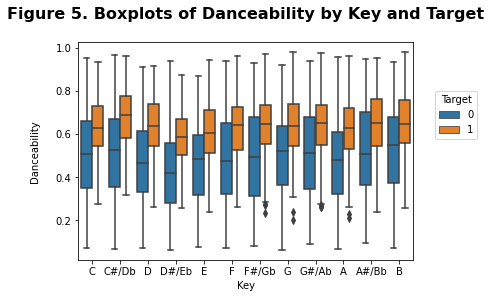

In [17]:
bp1 = sns.boxplot(x = 'key', y = 'danceability', hue = 'target', data = dataset)
bp1.set_xticklabels(['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B'])
plt.title('Figure 5. Boxplots of Danceability by Key and Target\n', fontdict = { 'fontsize' : 16, 'fontweight' : 'bold'})
plt.xlabel('Key')
plt.ylabel('Danceability\n')
plt.legend( bbox_to_anchor=(1.05, 0.8), title="Target")

Figure 5 is a boxplot of the <code>'danceability'</code> of a track by its <code>'key'</code>. It demonstrates a clear trend that "hit" (coded as '1') songs have higher scores in danceability, which may be part of their popularity. Furthermore, larger variation is seen in "flop" songs than their "hit" counterparts. The distinct pattern of the mean and variation between "hit" and "flop" songs may help dinstinguish them from one another. Key does not appear to have a strong affect on whether a song is a "hit" or not, only the danceability score.

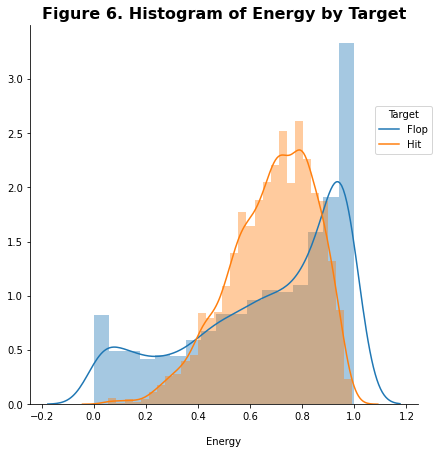

In [18]:
hist1 = sns.FacetGrid(dataset, height = 6, hue = 'target')
hist1 = hist1.map(sns.distplot, 'energy') 
plt.title('Figure 6. Histogram of Energy by Target', fontdict = { 'fontsize' : 16, 'fontweight' : 'bold'})
plt.xlabel('\nEnergy')
plt.legend(['Flop', 'Hit'],bbox_to_anchor = (1.05, 0.8), title="Target")

Similarly, Figure 6 demonstrates a trend in another feature of the dataset. Songs characterized as "hits" tend to form a left skewed normal distribution shape centered around 0.7 on `'energy'`. This is opposed to the tracks that are considered a "flop" in the `'target'` feature, which tend to increase in frequency with `'energy'`. Many songs in the "flop" set have the highest possible <code>'energy'</code> value.

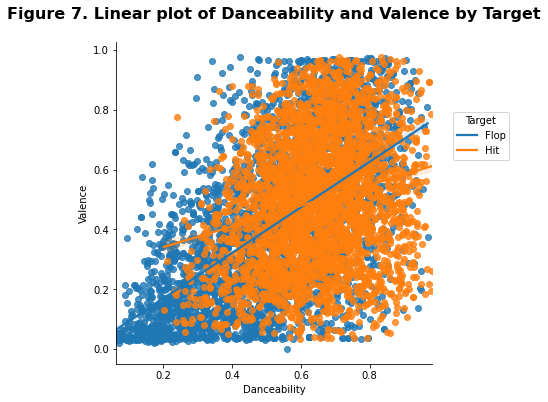

In [19]:
sns.lmplot(x='danceability',y='valence',order=1,hue = 'target',data=dataset, legend=False)
plt.title('Figure 7. Linear plot of Danceability and Valence by Target\n', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.legend(['Flop', 'Hit'], bbox_to_anchor = (1.05, 0.8), title="Target")

Figure 7 shows the same trend in Figure 5 where tracks that are "hits" are considered to have higher <code>'danceability'</code>. However it also demonstrates that "hits" don't always need to have a certain amount of <code>'valence'</code>, i.e. need to be "upbeat" and "postive". In fact, the highest amount of "flops" are songs that have the lowest <code>'valence'</code> and <code>'danceability'</code>.

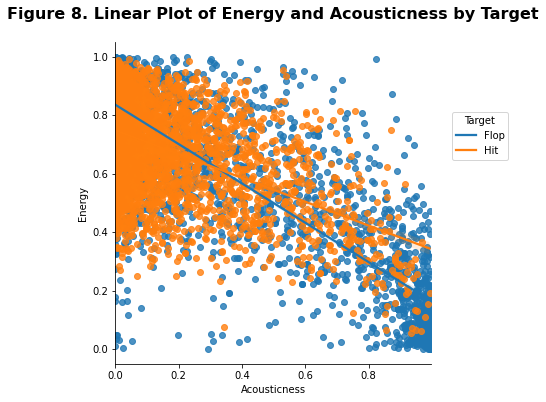

In [20]:
sns.lmplot(x='acousticness', y='energy', order = 1, hue = 'target', data = dataset, legend = False)
plt.title('Figure 8. Linear Plot of Energy and Acousticness by Target\n', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.legend(['Flop', 'Hit'], bbox_to_anchor=(1.05, 0.8), title="Target")

Figure 8 shows that a large cluster of tracks have higher, but not too high, <code>'energy'</code> values, but also shows that a lot of the tracks that are considered "hits" are have relatively low levels of <code>acousticness</code>, with a majority of these tracks having values of les than 0.2.

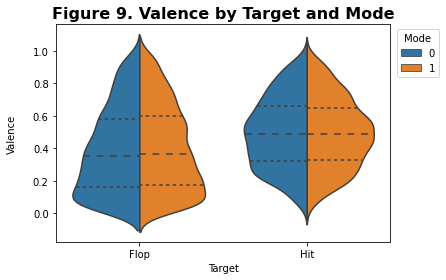

In [21]:
sns.violinplot(hue='mode',y='valence',x='target' , split=True,inner='quart', data=dataset, legends = False).set_xticklabels(['Flop','Hit'])
plt.title('Figure 9. Valence by Target and Mode',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('Target')
plt.ylabel('Valence\n')
plt.legend(bbox_to_anchor = (1.16, 1)).set_title('Mode')
plt.show()

Figure 9 shows little to no difference in distribution between the modality of the song, i.e. whether their key is in "major" or "minor". However, it also shows that the distribution of <code>'valence'</code> differ between the "hit" and the "flop" of the <code>'target'</code> feature. The distribution for the "hit" is more normal with a center mean, while the distribution for the "flop" is very right-skewed.

### <a id='EN'>Visualising by the <code>'energy'</code> Feature</a>

This section will focus on data as they relate to the <code>'energy'</code> feature. The <code>'energy'</code> feature was shown to have plenty of strong correlations, specifically a strong positive one with <code>'loudness</code> and a strong negative one with <code>'acousticness'</code>.

Text(0.5, 6.800000000000011, '\nValue of Acousticness')

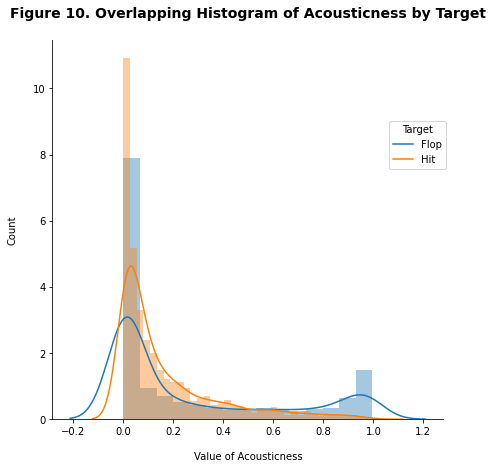

In [22]:
hist1 = sns.FacetGrid(dataset, height = 6, hue = 'target')
hist1 = hist1.map(sns.distplot, 'acousticness') 
plt.title('Figure 10. Overlapping Histogram of Acousticness by Target\n', fontdict = {'fontsize' : 14, 'fontweight' : 'bold'})
plt.legend(['Flop', 'Hit'], bbox_to_anchor = (1.02, 0.8), title = 'Target')
plt.ylabel('Count\n')
plt.xlabel('\nValue of Acousticness')

Figure 10 further exemplifies the point made in Figure 8 by showing that the majority of tracks with very low <code>'acousticness'</code> tend to be more often considered "hits". An overwhelming number of "hits" in the chart have near nonexistent <code>'acousticness'</code> levels. Both "hits" and "flops" share a similar distribution shape; however, the "flop" distribution has a higher peak, whereas the "hit" shows a longer tail.

Text(0, 0.5, 'Energy\n')

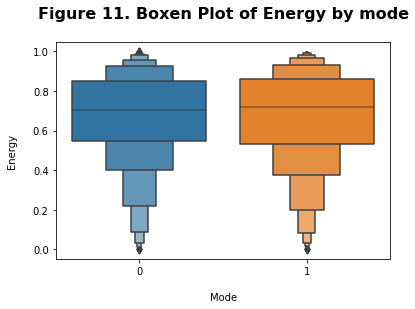

In [23]:
energyts_boxen = sns.boxenplot(x='mode', y='energy', data=dataset)
energyts_boxen.set_title('Figure 11. Boxen Plot of Energy by mode\n', fontdict = { 'fontsize' : 16,  'fontweight' : 'bold'})
energyts_boxen.set_xlabel('\nMode')
energyts_boxen.set_ylabel('Energy\n')

Figure 11 shows that the <code>'mode'</code> of a track doesn't create much difference in <code>'energy'</code>. This is contrary to the common musical connotation that 'Major' key (in this case, denoted by the "1") tends to have more "positive" associations.

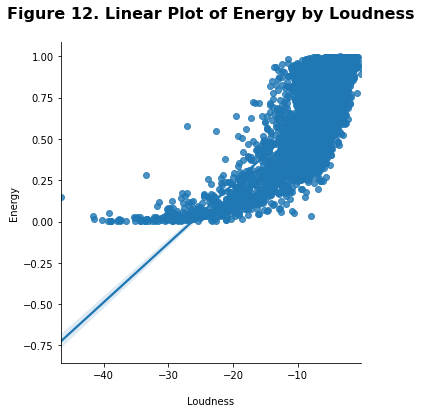

In [24]:
# checking the correlation between loudness and energy

sns.lmplot(x='loudness',y='energy',order=1,data=dataset)
plt.title('Figure 12. Linear Plot of Energy by Loudness\n', fontdict = { 'fontsize' : 16, 'fontweight' : 'bold'})
plt.xlabel('\nLoudness')
plt.ylabel('Energy')
plt.show()

A strong postive correlation is demonstrated between <code>'energy'</code> and the <code>'loudness'</code> features in Figure 12. The trend follows an exponential shape to a degree, with a large portion of the tracks moderate to high in `'energy'` being high in `'loudness'`.

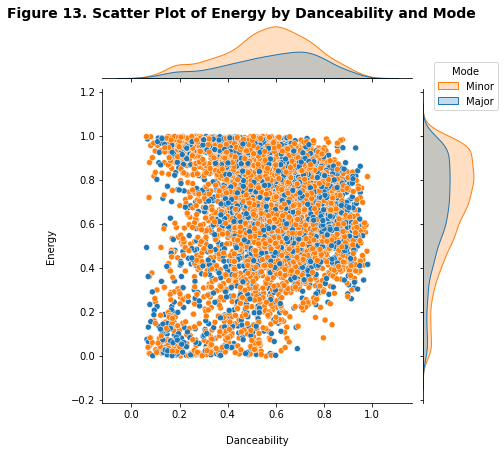

In [25]:
dancejoint = sns.jointplot(x = 'danceability', y = 'energy', hue = 'mode', kind = 'scatter', data=dataset, legend = False)
dancejoint.set_axis_labels('\nDanceability', 'Energy\n', fontsize=10)
plt.title('Figure 13. Scatter Plot of Energy by Danceability and Mode\n\n\n\n', loc = 'right', fontdict = {'fontsize' : 14, 'fontweight' : 'bold'})
plt.legend(['Minor', 'Major'], bbox_to_anchor = (1.5, 1.1), title = 'Mode')

Figure 13 shows that while <code>'mode'</code> doesn't affect the distribution of the other variables too much, the plot itself shows a somewhat postive correlation between <code>'energy'</code> and <code>'danceability'</code>.

## <a id='FP'>Further Preprocessing</a>

Here, the dataset will be one-hot encoded and scaled in preparation for the next phase. This is done after the visualisations because some of the figures and analysis are reliant on the dataset as it was before it is encoded and scaled. For example, Figure 6 uses the <code>'key'</code> feature, thus it could not have been made because that feature would have been twelve different columns instead of just one.

### <a id='OH'>One-Hot Encoding the Categorical Variables</a>

We only need to one-hot encode the <code>'key'</code> and <code>'time signature'</code> features since they  earnominale categorical denoted with numbers. However, for the purposes of this report, we won't apply these changes to the main dataset. This is to allow ease of visualisation for the next section.

In [26]:
# One hot encoding and making sure the target feature is at the end of the dataset
# The 'target' and 'mode' features are already one-hot encoded into binary features

dataset_onehot = pd.get_dummies(dataset, columns = ['key', 'time_signature'])
target = dataset_onehot['target']
dataset_onehot = dataset_onehot.drop(columns = 'target')
dataset_onehot['target'] = target
dataset_onehot.head(10)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,target
0,0.741,0.626,-4.826,0,0.0886,0.02000,0.0,0.0828,0.706,108.029,...,0,0,0,0,0,0,0,1,0,1
1,0.447,0.247,-14.661,0,0.0346,0.87100,1.0,0.0946,0.250,155.489,...,0,0,0,0,0,0,1,0,0,0
2,0.550,0.415,-6.557,0,0.0520,0.16100,0.0,0.1080,0.274,172.065,...,0,0,0,1,0,0,0,1,0,1
3,0.502,0.648,-5.698,0,0.0527,0.00513,0.0,0.2040,0.291,91.837,...,0,0,0,0,0,0,0,1,0,0
4,0.807,0.887,-3.892,1,0.2750,0.00381,0.0,0.3910,0.780,160.517,...,0,0,0,0,0,0,0,1,0,1
5,0.482,0.873,-3.145,1,0.0853,0.01110,0.0,0.4090,0.737,165.084,...,0,0,0,0,0,0,0,1,0,1
6,0.533,0.935,-3.704,1,0.1280,0.01390,0.0,0.1680,0.481,140.092,...,0,0,0,0,0,0,0,1,0,0
7,0.736,0.522,-8.020,1,0.1160,0.02990,0.0,0.1080,0.369,97.547,...,0,0,0,0,0,0,0,1,0,1
8,0.166,0.985,-2.886,1,0.1700,0.00183,1.0,0.9580,0.139,174.725,...,0,1,0,0,0,0,0,1,0,0
9,0.387,0.773,-5.685,1,0.1700,0.09800,0.0,0.2090,0.368,78.629,...,0,0,1,0,0,0,0,1,0,1


### <a id='SD'>Scaling the Dataset</a>

We will be scaling the dataset using the RobustScaler method because of the presence of outliers in the dataset. Like with the one-hot encoding section, we won't apply these changes to the actual dataset of this report, for ease of data visualisation.

In [27]:
dataset_onehot_robust = pd.DataFrame(preprocessing.RobustScaler().fit_transform(dataset_onehot), columns=dataset_onehot.columns)
dataset_onehot_robust.head(6).round(3)
dataset_onehot_robust.describe().round(3)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,target
count,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,...,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000,6356.000
mean,-0.075,-0.139,-0.386,-0.354,0.549,0.501,-0.377,0.466,0.026,0.028,...,0.080,0.107,0.070,0.087,0.066,0.090,0.069,-0.088,0.019,-0.498
std,0.726,0.745,1.363,0.478,1.306,0.996,0.485,1.092,0.634,0.703,...,0.271,0.309,0.255,0.282,0.248,0.286,0.253,0.283,0.137,0.500
min,-2.008,-2.224,-10.683,-1.000,-0.470,-0.224,-1.000,-0.718,-1.123,-1.932,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,-1.000
25%,-0.538,-0.555,-0.608,-1.000,-0.249,-0.196,-1.000,-0.192,-0.497,-0.528,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000
50%,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.462,0.445,0.392,0.000,0.751,0.804,0.000,0.808,0.503,0.472,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.495,0.888,1.562,0.000,11.507,3.143,0.000,5.624,1.399,2.115,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000


## <a id='SC'>Summary and Conclusions</a>

The Spotify dataset of song attributes and whether they were a "hit" seems to be appropriate for modelling, once appropriate preprocesssing is undertaken. Most features demonstrated adequate distributions with few outliers, no features containing missing values. However, `'speechiness'`, `'acousticness'`, , and `'liveness'` were identified to have more outliers than other features, which meant they needed to be appropriately managed to increase effectiveness of a fitted model; to manage this, robust standardisation was implemented.  Furthermore, `'instrumentalness'` demonstrated a high count of '0' values. As a result, it was converted into a binary variable which signified the presence of vocals in the song, rather than their magnitude. 

Based on the data explorations and visualisations, we can see very particular differences in the <code>'energy'</code>, <code>'danceability'</code>, and <code>'valence'</code> features when split by <code>'target'</code> into "hit" and "flop" tracks. Therefore, these variables will be crucial for the effectiveness of differentiating between the two in classification algorithms. Additionally, the distinct nature of most of the features in the dataset will allow for an appropriately fitted model. To manage the risk of overfitting, the feature `'sections'` was removed. This attempted to reduce noise, since similar infomation was already contained within `'duration_ms'`. 

Overall, preliminary data analysis indiciates that the majority of the features influence the target. Therefore, we can continue to phase 2, where classification models will be used to predict whether or not a song was listed in the Weekly Hot 100 by Billboard. Success in such predictions with present data would imply a formulaic nature of current popular music and may allow for predictions of which songs in the future will appear on similar "top hits" lists.

## <a id='REF'>References</a>

* Ansari, F. (2020). _The Spotify Hit Predictor Dataset (1960-2019)_ \[Dataset]. Kaggle. https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset/.